In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import sys
path ='/content/drive/MyDrive/cod/LEA3_FIN2/data'
os.chdir(path) ## volver la carpeta de repositorio directorio de trabajo
sys.path.append(path) ## agregarla al path, para leer archivos propios como paquetes

In [4]:
# LIBRERIAS
import numpy as np
import pandas as pd
import plotly.graph_objs as go ### para gráficos
import plotly.express as px
## import a_funciones as fn
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
Historicos= pd.read_csv('datos_historicos.csv')

In [8]:
Historicos.info()
Historicos.describe()
Historicos.isnull().sum()
Historicos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               10000 non-null  int64  
 1   CreditScore                      10000 non-null  int64  
 2   DebtRatio                        10000 non-null  float64
 3   Assets                           10000 non-null  int64  
 4   Age                              10000 non-null  int64  
 5   NumberOfDependents               10000 non-null  int64  
 6   NumberOfOpenCreditLinesAndLoans  10000 non-null  int64  
 7   MonthlyIncome                    10000 non-null  int64  
 8   NumberOfTimesPastDue             10000 non-null  int64  
 9   EmploymentLength                 10000 non-null  int64  
 10  HomeOwnership                    10000 non-null  object 
 11  Education                        10000 non-null  object 
 12  MaritalStatus      

,ID,CreditScore,DebtRatio,Assets,Age,NumberOfDependents,NumberOfOpenCreditLinesAndLoans,MonthlyIncome,NumberOfTimesPastDue,EmploymentLength,HomeOwnership,Education,MaritalStatus,YearsAtCurrentAddress,NoPaidPerc
0,1,384,0.016560,37950,20,0,2,17355,9,28,Mortgage,Bachelor,Divorced,18,0.196566
1,2,516,0.138825,22909,46,5,8,7175,13,0,Rent,Bachelor,Married,9,0.264438
2,3,638,0.391149,126521,80,5,7,1910,6,25,Rent,Bachelor,Single,9,0.287568
3,4,363,0.463521,39543,54,9,0,19339,5,22,Own,High School,Widowed,3,0.181348
4,5,804,0.504824,38522,72,1,10,7928,18,19,Own,PhD,Married,5,0.343376


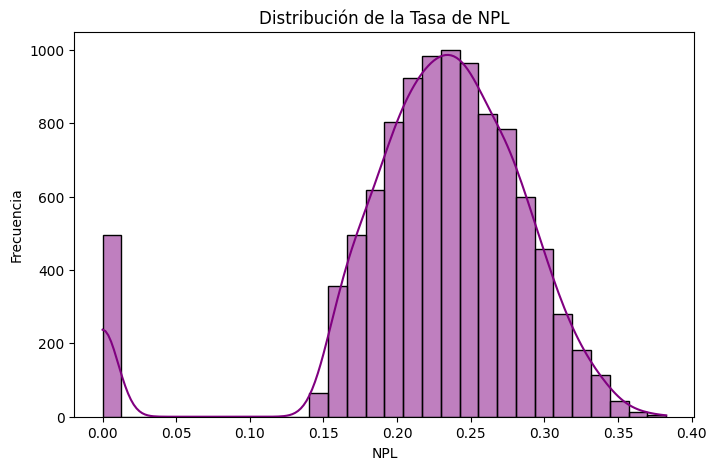

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(Historicos['NoPaidPerc'], kde=True, bins=30, color='purple')
plt.title('Distribución de la Tasa de NPL')
plt.xlabel('NPL')
plt.ylabel('Frecuencia')
plt.show()

In [17]:
Maximo= Historicos['NoPaidPerc'].max()
print('El valor maximo de porcentaje no pagado por un usuario de banca fue historicamente de : ',Maximo)
Minimo= Historicos['NoPaidPerc'].min()
print('El valor minimo de porcentaje no pagado por un usuario de banca fue historicamente de : ',Minimo)

El valor maximo de porcentaje no pagado por un usuario de banca fue historicamente de :  0.38279152
El valor minimo de porcentaje no pagado por un usuario de banca fue historicamente de :  0.0


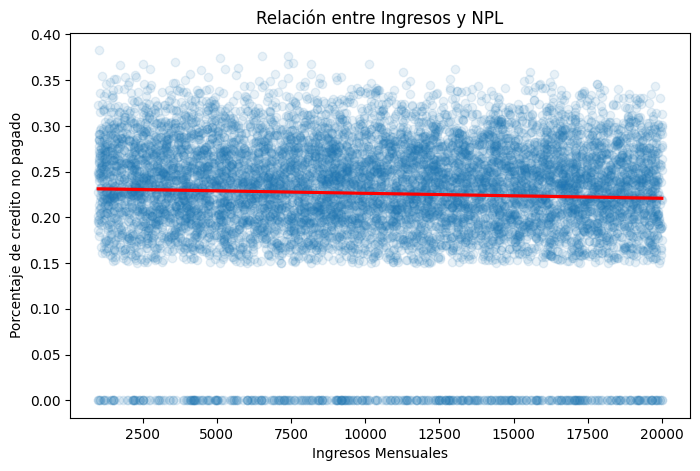

In [21]:
# NPL vs Ingresos
plt.figure(figsize=(8, 5))
sns.regplot(x='MonthlyIncome', y='NoPaidPerc', data=Historicos, scatter_kws={'alpha':0.1}, line_kws={"color":"red"})
plt.title('Relación entre Ingresos y NPL')
plt.xlabel('Ingresos Mensuales')
plt.ylabel('Porcentaje de credito no pagado')
plt.show()


In [20]:
promedio= Historicos['NoPaidPerc'].mean()
print('El promedio de porcentaje no pagado por un usuario de banca fue historicamente de : ',promedio)

El promedio de porcentaje no pagado por un usuario de banca fue historicamente de :  0.22605195131300002


## Analisís
Adicionalmente vemos que hay varios niveles que es el pago total de los creditos y que apartir del 15% se NPP hasta cerca del 40% pero no ha historicos entre los otros rangos es decir que no hay nadie que tenga un NPPerc entre mas del 1 y menos del 15%

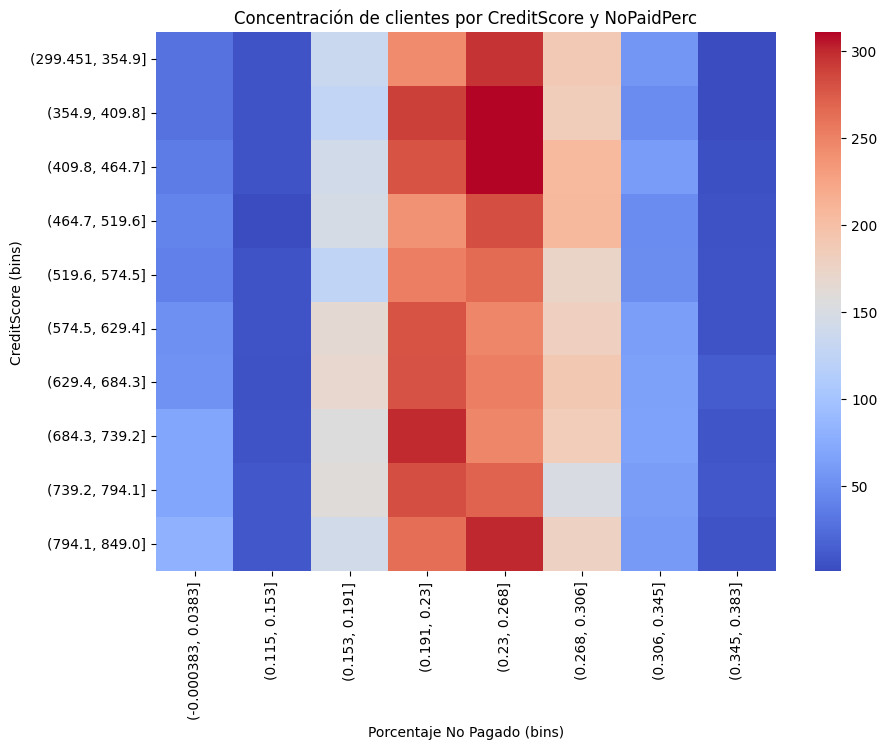

In [33]:
credit_bins = pd.cut(Historicos['CreditScore'], bins=10)
nopaid_bins = pd.cut(Historicos['NoPaidPerc'], bins=10)

heatmap_data = pd.crosstab(credit_bins, nopaid_bins)

plt.figure(figsize=(10,7))
sns.heatmap(heatmap_data, cmap='coolwarm')
plt.title('Concentración de clientes por CreditScore y NoPaidPerc')
plt.xlabel('Porcentaje No Pagado (bins)')
plt.ylabel('CreditScore (bins)')
plt.show()

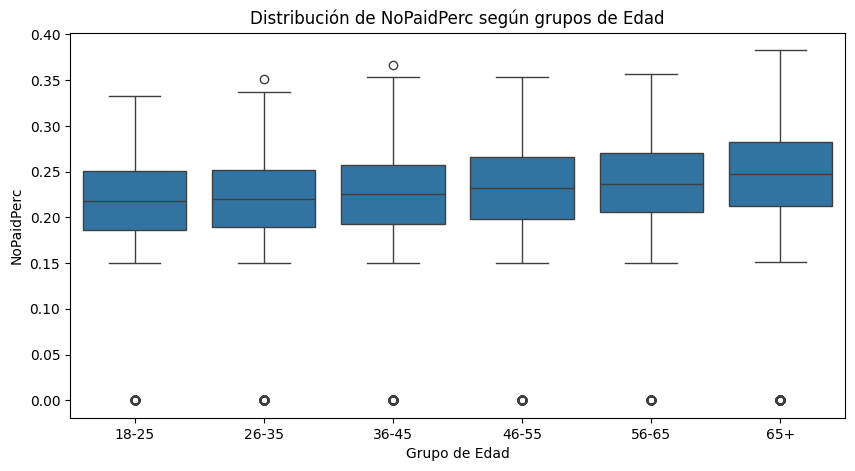

In [38]:

# Agrupar Age en rangos y analizar con boxplot
Historicos['AgeGroup'] = pd.cut(Historicos['Age'], bins=[18,25,35,45,55,65,100], labels=['18-25','26-35','36-45','46-55','56-65','65+'])

plt.figure(figsize=(10,5))
sns.boxplot(x='AgeGroup', y='NoPaidPerc', data=Historicos)
plt.title('Distribución de NoPaidPerc según grupos de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('NoPaidPerc')
plt.show()


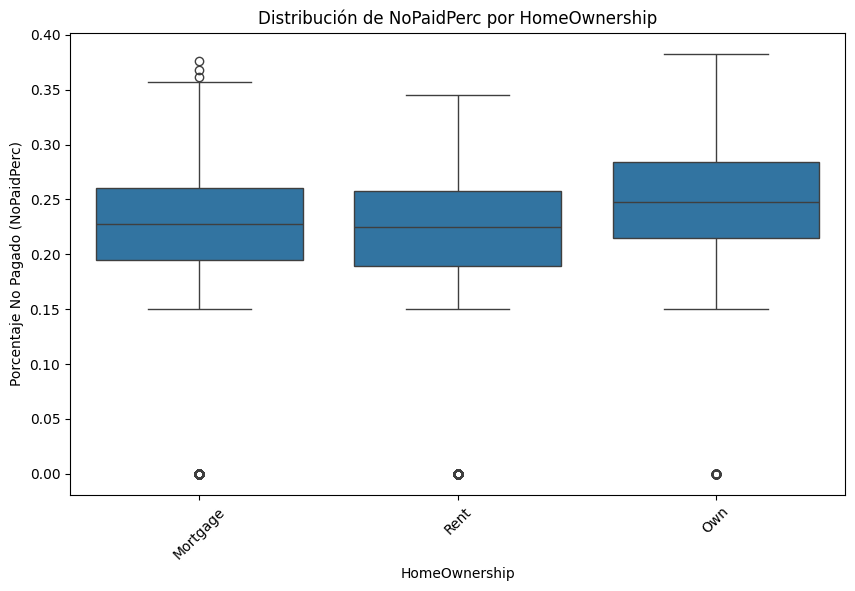

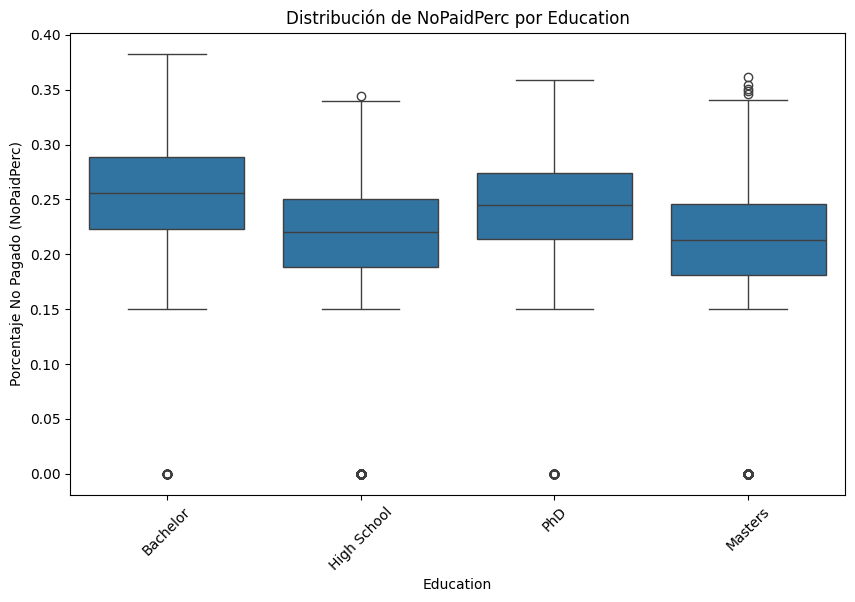

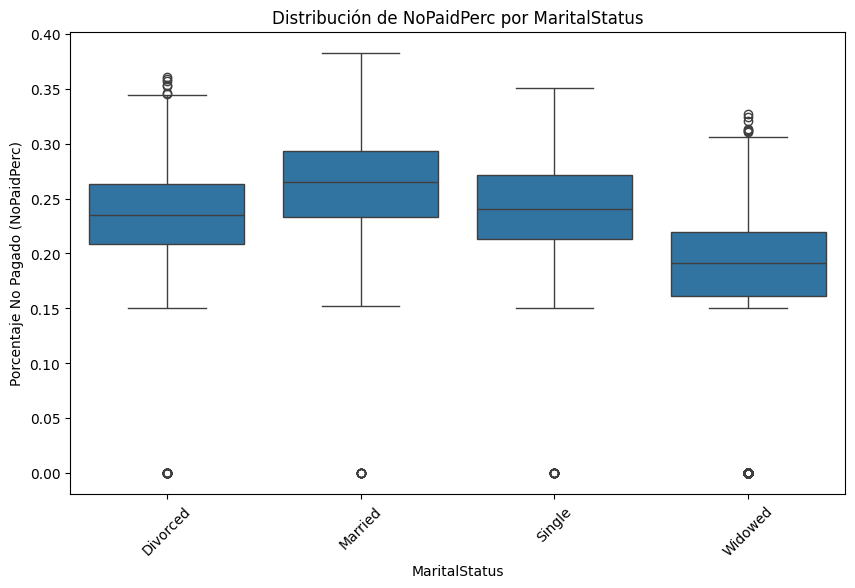

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

categoricas = ['HomeOwnership', 'Education', 'MaritalStatus']

for var in categoricas:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=var, y='NoPaidPerc', data=Historicos)
    plt.title(f'Distribución de NoPaidPerc por {var}')
    plt.xlabel(var)
    plt.ylabel('Porcentaje No Pagado (NoPaidPerc)')
    plt.xticks(rotation=45)
    plt.show()

# ANALISIS:
Se puede apreciar que los usuarios que no estan casados, tienen una tasa de no pago promedio inferior a los que si se encuentran casados

Para aquellos que cuentan casa propia se ve un aumento en el NPPerc, se puede asumir un prestamo a largo plazo y que aun no han pagado la totalidad del prestamo.